Group members: William Dugan, Kari S. Langeland, Sophia A. Wellman.

# Dictionary learning for classification problems

Machine learning is a type of artificial intelligence where computers can learn to identify patterns and classify information based on given data without being explicitly programmed to do so. There are different methods of machine learning, though all are based on two steps: training and testing. Training involves giving data to the computer and teaching it how to process the information and what to do with it. Testing is done by giving it a new set of data to execute what it has learned on. Machine learning is a rapidly growing field with increasing relevance and usage. A simple example of how we use machine learning is to sort out our spam in our e-mails.

This project will explore a method of machine learning for classification problems that is based on dictionary learning. Dictionary learning involves extracting a set of linear basis functions from a large dataset. These basis functions can represent data in a more compact and efficient way. The goal of this method is thus to represent the data with a small number of basis vectors while maintaining a high level of accuracy in the representation. To achieve this, we will implement two different methods of dictionary learning: Singular Value Decomposition (SVD) and Exemplar-based Non-negative Matrix Factorization (ENMF). The first method truncates a matrix of our dataset to hold only the most important basis vectors, while the latter decomposes a non-negative matrix by selecting random basis vectors for our dictionary.

The project consists of three parts. The first part creates a foundation to understand dictionary learning by investigating smaller matrices. Here, most of the numerical groundwork will be laid down. For the second part we introduce real data sets to train our computer on. Lastly, we test our program on a new data set and analyse the differences in the two methods of dictionary learning. 


## Task 1 - Matrix factorization
Let $A_1 = \begin{bmatrix}
1000 &1 \\
0 &1 \\
0 & 0
\end{bmatrix}$ and $A_2 = \begin{bmatrix}
1 &0  &0 \\ 
1 &0  &0 \\ 
0 &0  &1 
\end{bmatrix}$ be our two test matrices. We also have the matrix $B = \begin{bmatrix}
2 &0  &0 \\ 
1 &0  &1 \\ 
0 &1  &0 
\end{bmatrix}$.

### 1a
We start by defining our matrices in Python. We also define two functions for calculating the SVD factorization; one that performs the calculation, and one that tests and prints the result to the screen.

Note that we pass `full_matrices=False` to `np.linalg.svd` in order to not calculate a larger factorization than necessary. Let $\dim A = m \times n$, then $\dim U = m \times m$, but with `full_matrices=False` we get $\dim U = m \times \min(m,\ n)$.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Test matrices
A1 = np.array([
    [1000, 1],
    [0, 1],
    [0, 0]
])
A2 = np.array([
    [1, 0, 0],
    [1, 0, 0],
    [0, 0, 1] 
])
B = np.array([
    [2, 0, 0],
    [1, 0, 1],
    [0, 1, 0]
])

# SVD calculation
def SVD_calculation(matrix):
    """
    This function calculates the matrices U, Z (Zigma), and V (transposed) by performing SVD on input matrix.

    Parameters
    ----------
    matrix : np.ndarray
        Input matrix that the function will calculate the SVD of.
        
    Returns
    -------
    U : np.ndarray (m, d)
        Left singular matrix where columns contain the eigenvectors of A*A.T (testmatrix * testmatrix.transposed).
    Z : np.ndarray (d, d)
        Diagonal matrix containing singular values.
    Vt : np.ndarray (d, d)
        Right singular matrix where columns contain the eigenvectors of A.T*A (testmatrix.transposed * testmatrix).
    """
    U, S, Vt = np.linalg.svd(matrix, full_matrices=False)
    Z = np.diag(S)

    return U, Z, Vt

def printAndCheck(A, U, Z, Vt):
    """
    Prints matrices. Checks if their product is equal to desired matrix.

    Parameters
    ----------
    A : np.ndarray (m, d)
        Desired matrix. 
    U : np.ndarray (m, d)
        Left singular matrix where columns contain the eigenvectors of A*A.T (testmatrix * testmatrix.transposed).
    Z : np.ndarray (d, d)
        Diagonal matrix containing singular values.
    Vt : np.ndarray (d, d)
        Right singular matrix where columns contain the eigenvectors of A.T*A (testmatrix.transposed * testmatrix).

    """
    print(f"Original matrix = \n {A}" + "\n")
    print(f"U = \n {U}" + "\n")
    print(f"Zigma =\n {Z}" + "\n")
    print(f"V_transponert =\n {Vt}" + "\n")
    
    A_check = U@Z@Vt
    print(f"U*Z*V_transponert = \n {A_check}")
    np.testing.assert_almost_equal(A_check, A, decimal=5, err_msg="They are not equal to five decimalpoints.", verbose=True)


In [2]:
U, Z, Vt = SVD_calculation(A1)
printAndCheck(A1, U, Z, Vt)
W_1 = U.copy() # Saving dictionary for later use.

Original matrix = 
 [[1000    1]
 [   0    1]
 [   0    0]]

U = 
 [[ 1.e+00 -1.e-06]
 [ 1.e-06  1.e+00]
 [ 0.e+00  0.e+00]]

Zigma =
 [[1.0000005e+03 0.0000000e+00]
 [0.0000000e+00 9.9999950e-01]]

V_transponert =
 [[ 0.9999995  0.001    ]
 [-0.001      0.9999995]]

U*Z*V_transponert = 
 [[ 1.00000000e+03  1.00000000e+00]
 [-2.18499053e-19  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]]


We see that the SVD factorization gives $A_1$ in addition to some numerical errors. The first singular value $\Sigma_1 \approx 1000$ is much greater than $\Sigma_2 \approx 1$, meaning that it is more important for reconstructing $A_1$. We also know that the $\Sigma$ vector is calculated in such a way that it is sorted from most important to least important, in regards to reconstructing $A_1$.

### 1b
To calculate the truncated SVD factorization, we can calculate the full SVD with the implementation in **1a** and use array slicing.

In [3]:
def truncSVD(U, Z, Vt, d):
    """
    Calculate the truncated SVD given the SVD factorization of a matrix.

    Parameters
    ----------
    U : np.ndarray (m, d)
        Left singular matrix where columns contain the eigenvectors of A*A.T (testmatrix * testmatrix.transposed).
    Z : np.ndarray (d, d)
        Diagonal matrix containing singular values.
    Vt : np.ndarray (d, d)
        Right singular matrix where columns contain the eigenvectors of A.T*A (testmatrix.transposed * testmatrix).
    d : int
        Number of singular values (<= n).

    Returns
    -------
    W : np.ndarray (m, d)
        Truncated dictionary.
    H : np.ndarray (d, n)
        Truncated weights
    """
    # Truncating
    U = U[:,:d]
    Z = Z[:d,:d]
    Vt = Vt[:d,:]

    # W = U, H = Sigma V^T
    return U, Z @ Vt

In [4]:
U, Z, Vt = SVD_calculation(A2)
print('SVD')
printAndCheck(A2, U, Z, Vt)
# Observing that the last singular value is 0, so it can be removed
W, H = truncSVD(U, Z, Vt, d=2)
print(f'\ntruncated SVD:\nWH = \n{W@H}')
W_2 = W.copy()  # Saving dictionary for later use.

SVD
Original matrix = 
 [[1 0 0]
 [1 0 0]
 [0 0 1]]

U = 
 [[-0.70710678  0.         -0.70710678]
 [-0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]]

Zigma =
 [[1.41421356 0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         0.        ]]

V_transponert =
 [[-1. -0. -0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]

U*Z*V_transponert = 
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]

truncated SVD:
WH = 
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


Since the last singular value is $\Sigma_3 = 0$, we can remove it as it does not contain any important information. Therefore, we choose $d = 2$. We observe that even though we removed the last columns of $U$ in `truncSVD()`, we are still able to reconstruct $A_2$ as its rank is of dimension two. 

### 1c
Now that we have a way of generating, i.e.training, dictionaries, we need a way to project different data sets onto the dictionary. We define two calculations; one that calculates the projection, and one that calculates the distance between the columns of our data onto the dictionary. This will be especially important in Task 3 where we will use this for classification of data.

`dist(B, proj)` takes in a general projection such that it can be used later with non-negative projections.

In [5]:
def orthoproj(W, B):
    """
    Calculate the orthogonal projection of columns in matrix B onto the basis W.
    Eq. (14)

    Parameters
    ---------
    W : np.ndarray (m, d)
        Basis dictionary with orthonormal column vectors to be projected onto.
    B : np.ndarray, (d, n)
        Matrix.

    Returns
    -------
    proj : np.ndarray (m, n)
        The projection of matrix B onto dictionary W.
    """
    return W @ (W.T @ B)

def dist(B, proj):
    """
    Columnwise distance between projected vectors and the vector space.
    Eq. (15), (16)

    Parameters
    ---------
    B : np.ndarray (m, n) 
        The vectors space of interest. Typically the matrix we calculated the projection of onto the dictionary.
    proj : np.ndarray (m, n)
        The projection of matrix B onto a dictionary.

    Returns
    -------
    dist : np.ndarray (1, n)
        Array of distances between the columns in the projection and the columns in B.
    """
    return np.linalg.norm(B - proj, ord=2, axis=0)

Now we want to project the test matrix $B$ onto the dictionaries we found in **1a** and **1b**, $W_1$ and $W_2$, respectively.

In [6]:
for W in (W_1, W_2):
    projection = orthoproj(W, B)
    print(f"Projection: \n{projection}" )
    print(f"Distances: \n{dist(B, projection)}")

Projection: 
[[2.00000000e+00 0.00000000e+00 8.32531736e-23]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
Distances: 
[0.00000000e+00 1.00000000e+00 1.11022302e-16]
Projection: 
[[1.5 0.  0.5]
 [1.5 0.  0.5]
 [0.  1.  0. ]]
Distances: 
[0.70710678 0.         0.70710678]


We observe that for $W_1$ the distances are 0, 1, and (basically) 0. This tells us that two of the vectors ($b_1$ and $b_3$) of B lie in the span of the first dictionary ($W_1$), while the last vector ($b_2$) does not. Likewise, for second dictionary ($W_2$), $b_2$ lies in its span and returns a distance of zero, while the two other vectors do not lie in its span, and have a distance larger than zero. This is confirmed by trying to find a linear combination of the column vectors in $A_1$ and $A_2$ to recreate the column vector in matrix $B$.

### 1d
We will now implement a function that calculates the non-negative projections on a pre-determined non-negative dictionary.

In [7]:
def nnproj(W, B, maxiter=50, delta=1e-10):
    """
    Calculate the Non-Negative projection from matrix B onto dictionary W.

    Parameters
    ----------
    W : np.ndarray (m, d)
        Non-negative dictionary.
    B : np.ndarray (m, n)
        Matrix to project.

    Returns
    -------
    H : np.ndarray (d, n)
        Non-negative weights.
    P_W(B) : np.ndarray (m, n)
        Non-negative projection of B onto W.
    """
    d = W.shape[1]
    n = B.shape[1]
    
    H = np.random.uniform(0, 1, (d, n))

    # Checking if dim B = (m, n)
    assert B.shape == (W.shape[0], H.shape[1]), f'Mismached dimensions {B.shape} != {(W.shape[0], H.shape[1])}'

    matrix_1 = W.T @ B
    matrix_2 = W.T @ W

    for _ in range(maxiter):
        H = H * matrix_1 / (matrix_2 @ H + delta)
        
    return H, W @ H

We can now project the $B$ matrix onto $A_1$ and $A_2$. We do not need to remove any columns.

In [8]:
for A in (A1, A2):
    H, P = nnproj(W=A, B=B)
    dists = dist(B, P)

    print(f'Weights H = \n{H}\n'
        + f'Projection of B onto A \n{P}\n'
        + f'Distances {dists} \n'
        + '------------------------'
    )

Weights H = 
[[0.00100052 0.         0.        ]
 [0.99964994 0.         0.5       ]]
Projection of B onto A 
[[2.00017494 0.         0.5       ]
 [0.99964994 0.         0.5       ]
 [0.         0.         0.        ]]
Distances [3.91338763e-04 1.00000000e+00 7.07106781e-01] 
------------------------
Weights H = 
[[1.5 0.  0.5]
 [0.  0.  0. ]
 [0.  1.  0. ]]
Projection of B onto A 
[[1.5 0.  0.5]
 [1.5 0.  0.5]
 [0.  1.  0. ]]
Distances [7.07106781e-01 1.00000008e-10 7.07106781e-01] 
------------------------


We can confirm that our algorithm for non-negative projections work by comparing to the projections from **1c**. Ignoring the numerical errors that are present, we notice that the projections for $A_2$/$W_2$ are identical and that the projections for $A_1$/$W_1$ are nearly identical except for the last column. A possible explanation of the last observation is that although $b_3$ lies in the span of $A_1$, it does not lie in the non-negative span of A1. This is due to that $b_3$ is a linear combination of $A_1$'s second column added to the *negative* of $A_1$'s first column. In a non-negative projection, it can therefore never be recreated and it does not lie in $A_1$'s non-negative span. 

## Task 2 - MNIST images
We will now introduce a real dataset, MNIST (Modified National Institute of Standards and Technology), which contains images of handwritten numbers from 0 to 9. This dataset will be used to train our algorithm such that it might be able to classify images as the correct numbers later on.

We start by defining which digit we want to train on, and how many images we want to train on.

In [9]:
PLOT_DIGIT = 3 #Digit we want to plot
N_TRAIN = 1024 #Number of images pulled from the dataset

In [10]:
# Handed out code
def plotimgs(imgs, nplot = 4, suptitle=None):
    """
    Plots the nplot*nplot first images in imgs on an nplot x nplot grid. 
    Assumes heigth = width, and that the images are stored columnwise
    
    Parameters
    ----------
    imgs : np.ndarray
        (height*width,N) array containing images, where N > nplot**2
    nplot : int
        nplot**2 images will be plotted
    """

    n = imgs.shape[1]
    m = int(np.sqrt(imgs.shape[0]))

    assert n >= nplot**2, "Need amount of data in matrix N > nplot**2"

    # Initialize subplots
    fig, axes = plt.subplots(nplot,nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):

        # Break if we go out of bounds of the array
        if idx >= n:
            break

        # Indices
        i = idx//nplot
        j = idx%nplot

        axes[i,j].axis('off')
        axes[i,j].imshow(imgs[:,idx].reshape((m,m)), cmap = "gray")

    if isinstance(suptitle, str):
        plt.suptitle(suptitle)

    fig.tight_layout()
    plt.show()

### 2a
In this task we load our dataset, and plot the first 16 images of the number three. 

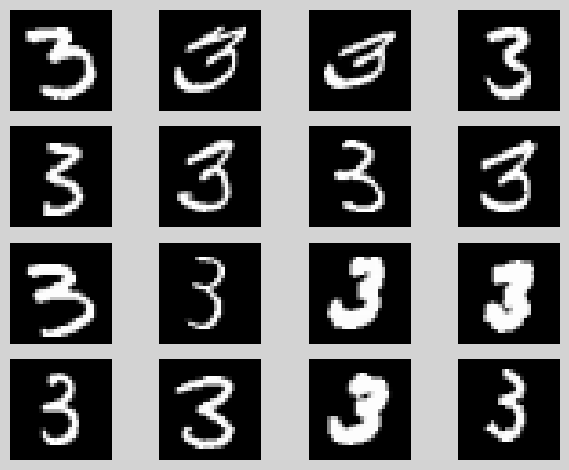

In [11]:
train = np.load('train.npy')[:,:,:N_TRAIN] / 255.0
plotimgs(train[:,PLOT_DIGIT,100:])

We observe that the number three has variations in its shape and rotation, as is as expected for handwritten numbers.

### 2b
We will now plot the same number but with truncated data, such that each image only has $d=16$ singular vectors.

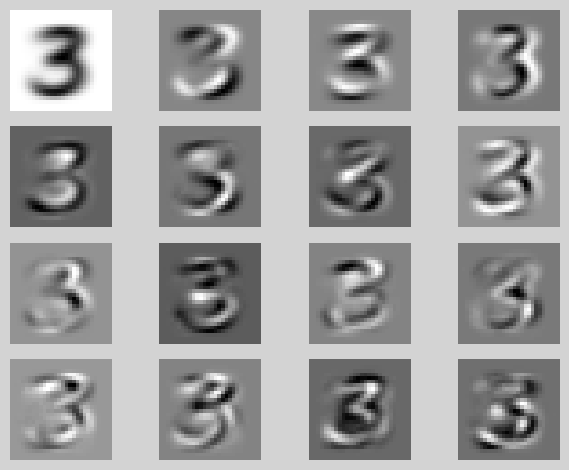

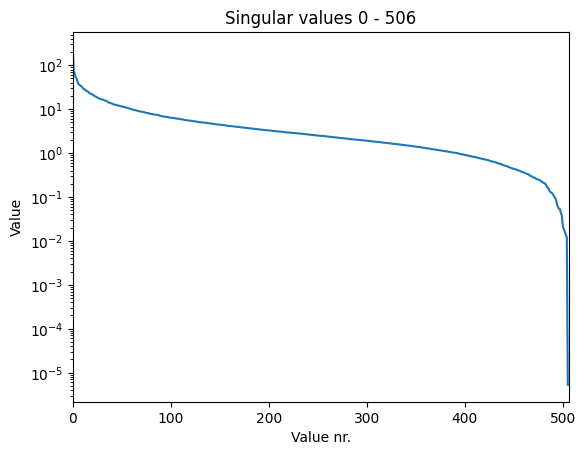

In [12]:
A = train[:,PLOT_DIGIT,:]
U, Z, Vt = SVD_calculation(A)
W, H = truncSVD(U, Z, Vt, d=16)
plotimgs(W)

singular_values = np.diag(Z)  # TODO remove this somehow
rank = np.linalg.matrix_rank(Z)

plt.semilogy(np.arange(rank), singular_values[:rank])
plt.title(f'Singular values 0 - {rank}')
plt.xlabel('Value nr.')
plt.ylabel('Value')
plt.xlim(0, rank)
plt.show()


Notice that the number three is still recognizable in the 16 plots though the information given to the algorithm is significantly less than in the original dataset. This tells us that even with only 16 singular vectors, we can capture the important features of our number. 

The second plot demonstrates that the largest singular values lie first in the rank of the matrix $\Sigma$, which therefore are protected when truncating the matrix from the back. Furthermore, we can note that the values are already significantly less than the highest ones when we reach the midpoint along the x-axis. This assures us that the removed columns do not hold as important information for reconstructing our images. Lastly, we observe that the rank of A is only approximately 500 compared to its actual dimension of 784. 

### 2c
Here, we define a helper function to plot projections together with the original image.

In [13]:
# Helper function
def plot_projection(projections, d_values, image):
    """
    Plots the projection for different values of d.

    Parameters
    ----------
    projections : np.ndarray (len(d), 784)
        Array with different projections.
    d_values : np.ndarray (m,)
        Different d values used for projections.
    image : np.ndarray (784,)
        Original image used for projections.
    """
    fig, axes = plt.subplots(nrows=1, ncols=len(d_values)+1, figsize=(10,4))

    axes = axes.flatten()  # flatten so they are easier to iterate over
    for i, ax in enumerate(axes):
        if i == 0:
            ax.imshow(image.reshape((28,28)), cmap='gray')
            ax.set(title='Original image')
        else:
            ax.imshow(projections[i-1].reshape((28,28)), cmap='gray')
            ax.set(title=f'd = {d_values[i-1]}')

        ax.axis('off')

    fig.tight_layout()
    plt.suptitle('Projection on dictionary ' + r'$W=U_d$', fontsize=20)
    plt.show()

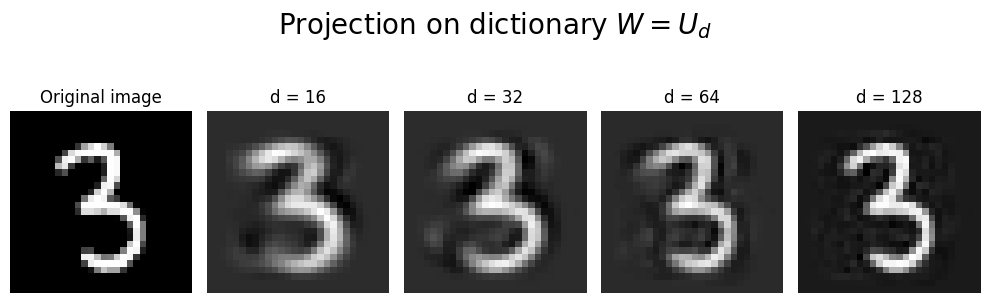

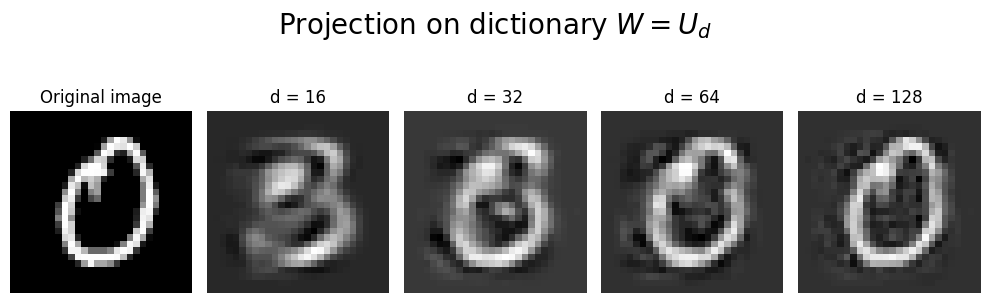

In [14]:
d = (16, 32, 64, 128)
image_index = 15  # Arbitrary image in A and B

if PLOT_DIGIT == 0:
    other_digit = 1  # If global plot digit is zero, we choose another digit, 
                    #assures that we plot two different digits
else:
    other_digit = 0

# Using A from 2b
image = A[:,image_index]
image_other = train[:,other_digit,image_index]

projections = np.zeros((len(d), A.shape[0]))
projections_other = np.zeros_like(projections)

for i, d_value in enumerate(d):
    # For global digit
    W, H = truncSVD(U, Z, Vt, d=d_value)
    projections[i] = orthoproj(W, image)

    # For other digit
    projections_other[i] = orthoproj(W, image_other)

# Plotting projections and original image
plot_projection(projections, d, image)
plot_projection(projections_other, d, image_other)

The upper part of the plot shows how an image of the number three is reconstructed for different values of $d$, where $d$ is the effective dimension of the truncated matrix. The first image is the original image, and thus not truncated. We observe that as the value for $d$ increases, the number three becomes more pronounced. Yet, they are all recocnizable as the number three.

For the lower part of the plot, we have projected an image of the number zero on a dictionary which is trained on the number three. The interesting part of this test is that we can observe that for high values of $d$, one is able to falsely represent other digits than the one we trained on. For the lowest $d$-value, we recognize the number three, and do not suspect it to be an image of zero, in contrast to the highest $d$-value. This means that we need to choose a $d$-value that is just high enough to capture the main features of each digit.

### 2d
In this task, we want to investigate how $||A - P_W(A)||_F^2$ changes for different $d$ values. Since the Frobenius norm is given by $||A||_F = \sqrt{\Sigma_i\Sigma_j|A_{ij}|^2}$, and we want the norm squared, we can easily avoid taking the square root, which is beneficial since it is a computationally heavy operation.

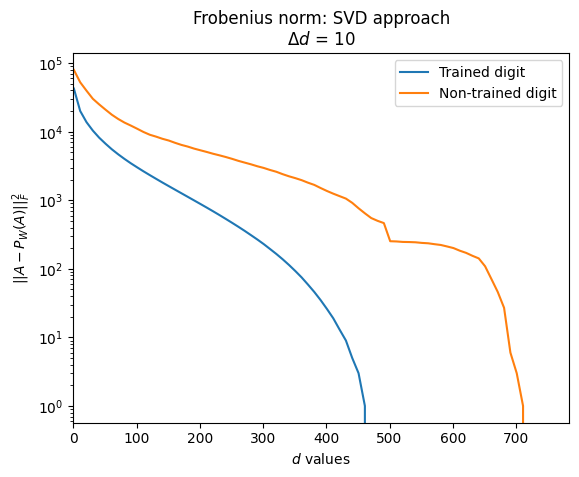

In [15]:
N = 10 #steplength in d
d = np.arange(1, 784, N) #Values for d

A_other = train[:,other_digit,:] #Pulling out other digit of train data set

#Creating y-vectors
normF_1 = np.zeros_like(d)
normF_2 = np.zeros_like(d)

for i, d_value in enumerate(d):
    W, _ = truncSVD(U, Z, Vt, d=d_value)

    # Projecting and difference
    C1 = A - orthoproj(W, A)
    C2 = A_other - orthoproj(W, A_other)

    #Calculating the squared Frobenius norm of C
    normF_1[i] = np.sum(C1**2)
    normF_2[i] = np.sum(C2**2)

#Plotting results
plt.semilogy(d, normF_1, label="Trained digit")
plt.semilogy(d, normF_2, label="Non-trained digit")
plt.title("Frobenius norm: SVD approach\n" + r'$\Delta d$ = ' + str(N))
plt.xlabel(r'$d$ values')
plt.ylabel(r'$||A - P_W(A)||_F^2$')
plt.xlim(0, 784)
plt.legend()
plt.show()

The plot of the Frobenius norm against values for $d$ is quite similar to the plot of the singular values in task **2b**. This might be due to that although less and less information is held in the latter columns included (meaning as we increase $d$), this will still converge to a better representation of the original matrix, thus that the norm will converge to zero.

From the plot, we can further observe how the orange graph also converges to a norm close to zero for high values of $d$. This graph shows the calculated norms when the projection is made onto a dictionary that is not trained for a given matrix, A. The fact that this norm closes in on zero as $d$ increases, confirms that an image can be recreated independent of what digit the dictionary is trained on, as long as enough information is given. Thus the plot above, is a quantitive representation of our observations from the plots in **2c**. 

### 2e
Now we want to try with the ENMF approach. First, we need to construct our non-negative dictionaries. Then, we can use `nnproj()` to calculate the non-negative projection, and `dist()` to calculate the distances.

This function returns a dictionary $W_d$ with $d$ randomly selected colums from a non-negative matrix $A^+$. Note that we use `replace=False` in `np.random.default_generator().choice()` in order to not get duplicate columns. To select columns instead of rows (default), we also pass `axis=1`.

In [16]:
def ENMF_dict(matrix, d):
    """
    Calculate an exemplar-based non-negative dictionary.

    Parameters
    ----------
    matrix : np.ndarray (m, n)
        Matrix we want to perform ENMF on.
    d : int
        Number of columns to be selected. Needs to be <= n.

    Returns
    -------
    W : np.ndarray (m, d)
        Non-negative trained dictionary.

    Raises
    ------
    ValueError. If d > n. 
    """
    W = np.array(matrix, copy=True, dtype=float)
    n = W.shape[1] #Number of columns

    if n == d:
        return W

    elif d < n:
        rng = np.random.default_rng()
        return rng.choice(W, size = d, axis = 1, replace = False)

    else:
        raise ValueError('Invalid d value, must be less than number of columns in W')


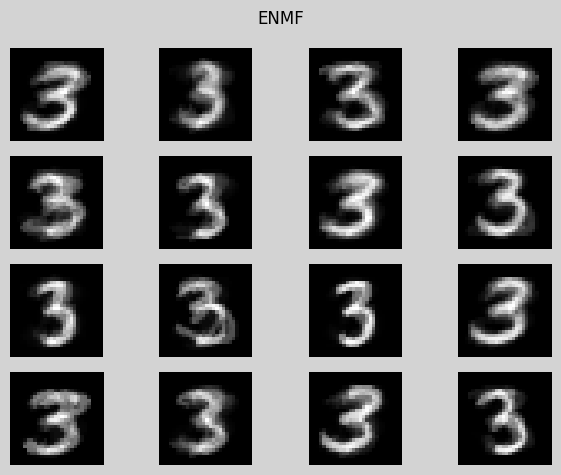

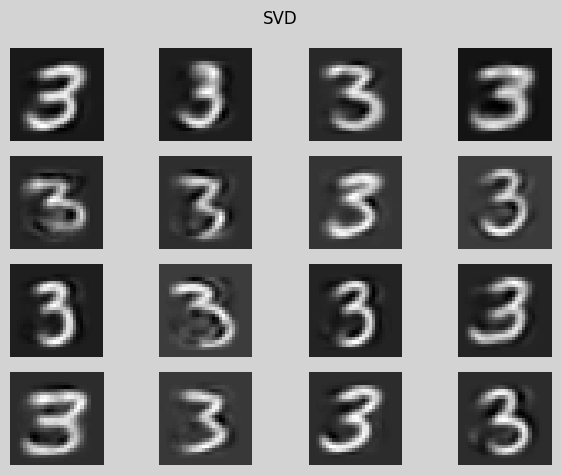

In [17]:
# Using A from 2b

# ENMF approach
W = ENMF_dict(A, d=32)
_, P = nnproj(W, A)
plotimgs(P, suptitle='ENMF')

# SVD for comparison
W, _ = truncSVD(U, Z, Vt, d=32)
P = orthoproj(W, A)
plotimgs(P, suptitle='SVD')

From the plots of the first 16 images of 3 we notice that the ENMF approach reconstructs images that are more clear compared to the SVD approach. Though both methods produce numbers we can recognize as the number 3, there are more disturbances, or rather "ghosting", in the images from the SVD method. The term "ghosting" is used for the occurance where we observe other shapes in the black background of the images. The pixels in the images are represented by a number between 0 and 1, which is the reason behind that we observe ghosting for SVD. The lowest value in the non-negative projection will be 0, which is not the case for SVD where negative numbers are allowed. As a result the darkest pixels in the non-negative projections will be completely black. This gives a cleared picture, compared to SVD.

### 2f
To continue our investigation of the ENMF approach, we repeat the procedure in **2d**, using ENMF instead of SVD.

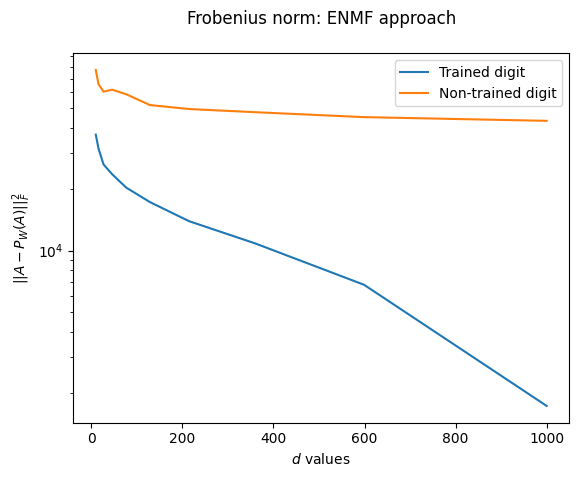

In [18]:
d = np.logspace(1, 3, num=10, dtype=int)

# Using A and A_other from 2d

#Creating y-vectors
normF_1 = np.zeros_like(d)
normF_2 = np.zeros_like(d)

for i, d_value in enumerate(d):
    W = ENMF_dict(A, d_value)

    # Projecting and difference
    C1 = A - nnproj(W, A)[1]
    C2 = A_other - nnproj(W, A_other)[1]

    #Calculating the squared Frobenius norm of C
    normF_1[i] = np.sum(C1**2)
    normF_2[i] = np.sum(C2**2)

#Plotting results
plt.semilogy(d, normF_1, label="Trained digit")
plt.semilogy(d, normF_2, label="Non-trained digit")
plt.title("Frobenius norm: ENMF approach\n")
plt.xlabel(r'$d$ values')
plt.ylabel(r'$||A - P_W(A)||_F^2$')
plt.legend()
plt.show()

In contrast to the SVD approach we observe that for higher values of $d$, the Frobenius norm remains large, despite a slight decreasing trend. The reason could be that ENMF projection suffers from numerical errors. The algorithm then needs a very large amount of iterations to acutally converge. 

The large norm may also be partly attributed to the stochastic nature of the algorithm. Unlike SVD, which guarantees the inclusion of all relevant vectors in the projection, the selection of basis vectors in ENMF is a random process, and it is not guaranteed that all important features are captured by the selected vectors. As a result, increasing the number of basis vectors by increasing the parameter $d$ may not necessarily improve the quality of the projection. Instead, the resulting projection may contain a mix of relevant and less relevant vectors, leading to a large reconstruction error and a relatively large Frobenius norm.


## Task 3 - Classification

We will now test our two dictionary learning methods on a new set of images. The new dataset is a shuffled selection of the MNIST data. The code written in this section will classify each image to a digit, and calculate the accuracy and recall of each method. 

### 3a

To prevent our virtual environment from crashing, we limit the amount of images we test our algorithm on to 200 images per digit.

There are three functions defined below. The first one is extracted from the handed out code which returns a shuffled set of images to test our methods on. The next function calculates the distances from a matrix containing our test data to a dictionary. These distances are stored and returned. Lastly, the code in this task classifies each image to a digit based on its distance to each class. The class to which the image is closest to, is the class to which it is classified.

In [19]:
# This will give us a progress bar later:)
!pip install tqdm
from tqdm import tqdm

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [20]:
N_TEST = 200 #Number of images per digit

# Handed out code
def generate_test(test, digits = [0,1,2], N = 800):
    """
    Randomly generates test set.
    
    Parameters
    ----------
    test : numpy array. 
        Should be the test data loaded from file
    digits : python list. 
        Contains desired integers
    N : int. 
        Amount of test data for each class
    Returns
    -------
    test_sub : (784,len(digits)*N) numpy array. 
        Contains len(digits)*N images
    test_labels : (len(digits)*N) numpy array. 
        Contains labels corresponding to the images of test_sub
    """
    assert N <= test.shape[2] , "N needs to be smaller than or equal to the total amount of available test data for each class"
    assert len(digits) <= 10, "List of digits can only contain up to 10 digits"

    # Arrays to store test set and labels
    test_sub = np.zeros((test.shape[0], len(digits)*N))
    test_labels = np.zeros(len(digits)*N)

    # Iterate over all digit classes and store test data and labels
    for i, digit in enumerate(digits):
        test_sub[:, i*N:(i+1)*N] = test[:,digit,:N]
        test_labels[i*N:(i+1)*N] = digit

    # Indexes to be shuffled 
    ids = np.arange(0,len(digits)*N)

    # Shuffle indexes
    np.random.shuffle(ids)

    # Return shuffled data 
    return test_sub[:,ids], test_labels[ids]

In [21]:
def get_distances(B, dict_list, SVD=True):
    """
    Calculate the distances of test data in matrix B by projecting onto
    different basises.

    Parameters
    ----------
    B : np.ndarray (784, n_train)
        Test dataset.
    dict_list : list[np.ndarray]
        List with dictionaries trained on different digits (and with different methods).
    SVD : bool
        Default True. Triggers either orthonormal (SVD) or non-negative (ENMF) projection
    
    Returns
    -------
    dist_list : np.ndarray
        List with arrays containing projection distances for each basis.
    """
    if SVD:
        return np.asarray([dist(B, proj=orthoproj(W, B)) for W in dict_list])
    else:
        return np.asarray([dist(B, proj=nnproj(W, B)[1]) for W in dict_list])

def classification(B, dict_list, SVD=True):
    """
    Classifiy test data given different dictionaries based on projection distances.

    Parameters
    ----------
    B : np.ndarray (784, n)
        Test dataset.
    dict_list : list[np.ndarray]
        List with dictionaries trained on different digits (and with different methods).
    SVD : bool
        Default True. Triggers either orthonormal (SVD) or non-negative (ENMF) projection
    
    Returns
    -------
    np.ndarray (n,)
        Vector containing predicted class for all test data.
    """
    return np.argmin(get_distances(B, dict_list, SVD), axis=0)

### 3b
To test our methods, we generate a dataset with three different digits and use our functions from **3a** to classify them with $d=32$. The accuracy and recall of the individual classes are then calculated and printed for analysis. 

In [22]:
def analyze_classification(test_labels, trained_labels, digits):
    """
    Perform classification on a test dataset.

    Parameters
    ----------
    test_labels : np.ndarray (n,)
        Class labels as integers 0-9.
    trained_labels : np.ndarray (n,)
        Known (thus correct) class labels as integers 0-9.
    digits : np.ndarray (num_digits,)
        Test digits.
    
    Returns
    -------
    accuracy : float
        Value between 0 and 1 as a total measure.
    recall : np.ndarray[float] (num_digits,)
        Accuracy measure for each class. Values > 0.
    """
    accuracy = np.count_nonzero(trained_labels == test_labels) / len(test_labels)  # Eq. (24)
    class_count = np.zeros_like(digits)     # Numerator eq. (25)
    class_possible = np.zeros_like(digits)  # Denomenator eq. (25)

    # Counting
    for a, b in zip(trained_labels, test_labels):
        if a == b:
            class_count[int(a)] += 1
        class_possible[int(b)] += 1
        
    recall = class_count / class_possible
    return accuracy, recall

Now we can perform the calculations with $d = 32$.

Test data shape:  (784, 600)
Test labels shape:  (600,)
First 16 labels:  [1. 0. 2. 0. 1. 0. 1. 2. 2. 0. 2. 2. 0. 0. 1. 0.]


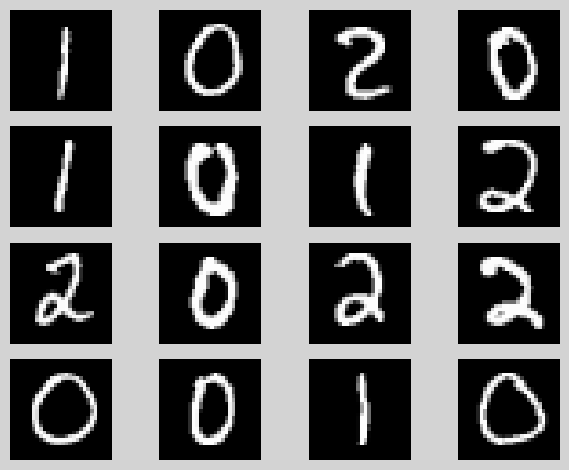


SVD
Accuracy : 0.987
Digits : [0 1 2]
Recall for numbers [0 1 2]: [0.995 1.    0.965]

ENMF
Accuracy : 0.982
Digits : [0 1 2]
Recall for numbers [0 1 2]: [0.99  0.99  0.965]


In [23]:
# Loading training data
train_digits = np.arange(3)

# Training with SVD
dict_list_SVD = [truncSVD(*SVD_calculation(matrix=train[:,i,:]), d=32)[0] for i in train_digits]

# Training with ENMF
dict_list_ENMF = [ENMF_dict(matrix=train[:,i,:], d=32) for i in train_digits]

# Test setup
test = np.load('test.npy')[:,:,:N_TEST] / 255.0
test_digits = train_digits.copy()

# Handed out code
A_test, A_labels = generate_test(test, digits=test_digits, N=N_TEST)
print("Test data shape: ", A_test.shape)
print("Test labels shape: ", A_labels.shape)
print("First 16 labels: ", A_labels[:16])
plotimgs(A_test, nplot = 4)

for dict_list, svd in zip((dict_list_SVD, dict_list_ENMF), (True, False)):
    print('\nSVD') if svd else print('\nENMF')

    # Classification
    classes = classification(A_test, dict_list, svd)

    # Analysis
    accuracy, recall = analyze_classification(A_labels, classes, test_digits)
    print(f'Accuracy : {accuracy:.3f}')
    print(f'Digits : {test_digits}')
    print(f'Recall for numbers {train_digits}: {recall}')

We observe that the accuracy of the two methods are quite similar, and well above the 90% which we aimed for. The SVD approach still has a slightly higher accuracy than the ENMF approach. This might be due to that ENMF selects random basis vectors. Some of these might not hold as relevant information as needed to match the information that SVD includes, as it uses the $d$ first basis columns where most information is stored. 

The recall of the different classes are as expected; it is easier to classify a 1-digit as it is a single straight line. The machine misclassifies some 0-digits for 2-digits, and vice versa. This goes for both methods. The reason is most likely due to some similar traits, such as the curved top of the digits. One should be able to see larger differences by choosing more similar digits, for example 1, 2, 4, and 7. Our program does not support non-incremental values that start on 0. This will be discussed in the end of the project.

Choosing $d = 32$ column vectors seem to be appropriate which we will further discuss in the last task.

### 3c & 3d
Continuing, we choose the digit 0 to investigate further. The reason behind is that it should be quite simple to classify. Our investigation will consist of determining which image is most likely to be *correctly classified*, as well as looking into an image that was *misclassified*. Both will be plotted next to their projection onto the dictionary of class 0. The misclassified image will also be plotted next to its projection onto the dictionary of which it was wrongfully sorted into.

In [24]:
#Calculating and storing projections, distances and testlabels
proj = np.asarray([nnproj(dict_list_ENMF[i], A_test)[1] for i in test_digits]) # proj is ( class, 784, N_TRAIN * len(test_digits) )
distances = np.asarray(get_distances(A_test, proj, SVD=False))
test_labels = classification(A_test, dict_list_ENMF, SVD=False)

To locate which image is best or "most likely correct", we look for the image which has the smallest distance to its projection. To find a misclassified image and its index, we use a for-loop with if-statements to check if the elements in dataset A and test-dataset are the same for each index. When the loop finds an index where their elements are not equal, this index is saved and represents the misclassified image. 

In [25]:
# Locating best image
bestImageIndex = np.argmin(distances[0])
bestImage = A_test[:,bestImageIndex]
bestImageProj = proj[0,:,bestImageIndex]

assert bestImageIndex < len(test_digits)*N_TEST, "Best image index is bigger than number of images in test dataset."

#Locating misclassified zero-image
misclassifiedImageIndex = None
for i, (a, b) in enumerate(zip(A_labels, test_labels)):
    if a == 0:
        if a != b:
            misclassified_class = b
            misclassifiedImageIndex = i
            break

assert misclassifiedImageIndex is not None, "No mismatches found"

# Locating misclassified image
misclassifiedImage = A_test[:,misclassifiedImageIndex]
missclassifiedImageProj_1 = proj[0,:,misclassifiedImageIndex]
missclassifiedImageProj_2 = proj[misclassified_class,:,misclassifiedImageIndex]

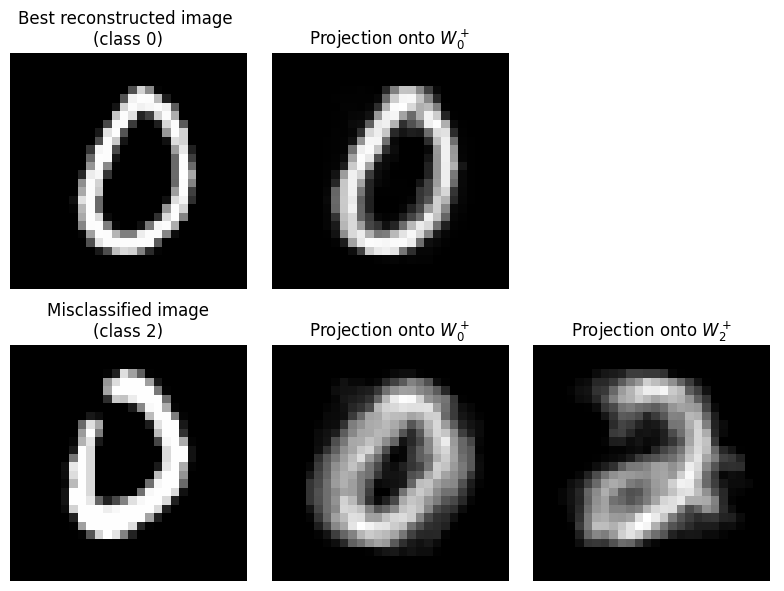

In [26]:
# Initialize subplots
fig, axes = plt.subplots(2, 3, figsize=(8,6))
fig.subplots_adjust(hspace=0.5)

#Plotting best image and its projection onto basis
axes[0, 0].imshow(bestImage.reshape((28,28)), cmap='gray')
axes[0, 0].set_title("Best reconstructed image \n(class 0)")

axes[0, 1].imshow(bestImageProj.reshape((28,28)), cmap='gray')
axes[0, 1].set_title(r"Projection onto $W_0^+$")

#Plotting worst image and its projection onto basis
axes[1, 0].imshow(misclassifiedImage.reshape((28,28)), cmap='gray')
axes[1, 0].set_title(f"Misclassified image\n(class {misclassified_class:.0f})")

axes[1, 1].imshow(missclassifiedImageProj_1.reshape((28,28)), cmap='gray')
axes[1, 1].set_title(r"Projection onto $W_0^+$")

axes[1, 2].imshow(missclassifiedImageProj_2.reshape((28,28)), cmap='gray')
class_label = f"W_{misclassified_class:.0f}^+"
axes[1, 2].set_title("Projection onto " + f'${class_label}$')

for ax in axes.flatten():
    ax.axis('off')  # Removing axis ticks

plt.tight_layout()
plt.show()

In the figure above, we observe that misclassified image project well onto $W_2^+$, most likely due to it not being a completed circle. As this is a common trait for 2-digits, it is reasonable that it is classified as a 2-digit. We note that the misclassified digit is an outlier; most 0-digits are a full circle. 

The best image on the other hand, though it is crooked, presents the typical zero features. It may not look like a perfect number 0, but its features suit class 0 well with its curved bottom, and somewhat curved top. Few handwritten zeroes are perfectly round, they are often crooked, thus the dictionary for class 0 is most likely to reconstruct these shapes the best. This would explain why the dictionary for class 0 projects the image above better than perhaps, a rounder zero. 

### 3e
We now want to include more digits to classify, so that we can investigate the effect this has on accuracy and recall for the SVD and ENMF approach. Instead of only training and testing on 0, 1, and 2, we will now also train and test for $0, \dots, 5$.

In [27]:
train_digits = np.arange(6)

# Training with SVD
dict_list_SVD = [truncSVD(*SVD_calculation(matrix=train[:,i,:]), d=32)[0] for i in train_digits]

# Training with ENMF
dict_list_ENMF = [ENMF_dict(matrix=train[:,i,:], d=32) for i in train_digits]

# Generating test data
test_digits = train_digits.copy()
A_test, A_labels = generate_test(test, digits=test_digits, N=N_TEST)

for dict_list, svd in zip((dict_list_SVD, dict_list_ENMF), (True, False)):
    print('\nSVD') if svd else print('\nENMF')

    # Classification
    classes = classification(A_test, dict_list, svd)

    # Analysis
    accuracy, recall = analyze_classification(A_labels, classes, test_digits)
    print(f'Accuracy : {accuracy:.3f}')
    print(f'Digits : {test_digits}')
    print(f'Recall : {recall}')


SVD
Accuracy : 0.974
Digits : [0 1 2 3 4 5]
Recall : [0.995 0.995 0.95  0.96  0.98  0.965]

ENMF
Accuracy : 0.939
Digits : [0 1 2 3 4 5]
Recall : [0.985 0.99  0.93  0.885 0.975 0.87 ]


We obseve that the recall is lower with multiple classes. A possible reason for this phenomenon is that there are more possibilites for the computer to misclassify a digit. Rather than only three classes to sort into, the computer is now given a total of six classes. Thus the probability that it can misclassify increases. For the same reason, the accuracy will also decrease for both methods. 

The 1-digit has the highest recall for both SVD and ENMF. This is most likely due to its distinct shape compared to the other digits in the dataset. 

With more classes included we notice that the accuracy of SVD and ENMF are no longer similar. The accuracy is significantly higher using SVD, compared to ENMF. With $d = 32$ column vectors, the SVD will have no issues capturing the most important singular values. This is not the case with ENMF, as the vectors are chosen at random. It is therefore logical to assume that ENMF needs more basis vectors, compared to SVD. 

### 3f
The last part of our analysis of SVD and ENMF consists of investigating how the number of basis vectors influences their accuracy. We will use the same digits for training and testing as in **3e**.

In [28]:
# List with elements U1, Z1, Vt1, U2, Z2, ...
SVD_dicts = [SVD_calculation(train[:,i,:]) for i in train_digits]

d = np.logspace(1, 10, base=2, num=10, dtype=int)
accuracies = np.zeros((10, 2))

for i, d_value in enumerate(tqdm(d)):
    # Training
    truncSVD_dicts = [truncSVD(U, Z, Vt, d=d_value)[0] for U, Z, Vt in SVD_dicts]
    ENMF_dicts = [ENMF_dict(train[:,i,:], d=d_value) for i in train_digits]

    # Testing
    classes_SVD = classification(A_test, truncSVD_dicts, SVD=True)
    classes_ENMF = classification(A_test, ENMF_dicts, SVD=False)
    
    # Finding correct classifications
    accuracy_svd, _ = analyze_classification(classes_SVD, A_labels, digits=test_digits)
    accuracy_enmf, _ = analyze_classification(classes_ENMF, A_labels, digits=test_digits)

    accuracies[i] = accuracy_svd, accuracy_enmf

100%|██████████| 10/10 [00:43<00:00,  4.36s/it]


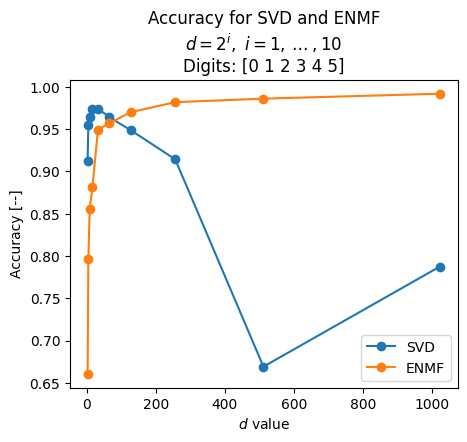

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.plot(d, accuracies[:,0], '-o', label='SVD')
ax.plot(d, accuracies[:,1], '-o', label='ENMF')
ax.legend(loc='lower right')
ax.set(xlabel='$d$ value', ylabel='Accuracy [--]')
plt.title('Accuracy for SVD and ENMF\n' + '$d = 2^i,\ i = 1,\dots,10$\n' + f'Digits: {train_digits}')
plt.show()

Let us focus on $d < 100$ first. Here, we see that SVD has better accuracy than ENMF. This confirms our assumption in **3e**; SVD needs fewer basis vectors than ENMF. With $d = 16, 32$ as we used in **task 2**, the accuracy is higher for SVD. This means it is an appropriate number of basis vectors for the method. This corresponds well with the results in **2c**. 

For $100 < d <$ rank $A$, the accuracy of SVD decreases, while it increases for ENMF. An explanation of the first might be that for higher values of $d$, it will be easier to falsely reconstruct images using SVD. This is demonstrated in task **2c**. The SVD approximation will also capture more noise from the image, resulting in lower accuracy. An explanation of the latter, is that as more columns are included, the ENMF dictionary can capture more complexity in the data, which increases accuracy. 

When $d >$ rank $A$, the accuracy of SVD increases again. This is due to that the truncated SVD of A will start to converge to a full SVD. The additional columns in U and Vt contain more information about A, which helps improve the accuracy. The accuracy for ENMF most likely increases due that more information is stored in the dictionary. 

The best accuracy for both ENMF and SVD is obtained with $d$=100, which we conclude from our plot above.

Our plot urges us to conclude that using 50 iterations for calculating weights is suffucient for near convergence to reconstructing A. 

### Disucssion

#### SVD vs ENMF dictionaries

The SVD approach to dictionary learning is more computationally demanding than the ENMF approach. Yet, it reaches convergence of the Frobenius norm to zero quicker than ENMF does. This is demonstrated in task **2e** vs. **2f**.  Despite this fact, we have not suffered great losses from that ENMF has more numerical errors than SVD. The images are well reconstructed and the accuracy and recall for ENMF are high despite them being lower than for SVD. ENMF is an appreciatable method as it is quick and constructs images with less "ghosting". The "ghosting" effect in SVD is demonstrated in **2e**. This is why the ENMF approach might be a suitable option for dictionary learning that involves large datasets of images. For smaller datasets, if higher accuracy is desired, the SVD approach works well too. 

In task **3f** we discussed how the accuracy changes with higher values of $d$. What we observe is that the accuracy of SVD varies drastically compared to the accuracy of ENMF. This would be an extra consideration to make if one chooses to use the SVD approach. The ENMF approach provides a more reliable accuracy, which is usually beneficial in programming. 

#### Limitations of implementation
- **1a**: `SVD_calculation()`. Even though `np.linalg.svd` returns the singular values in a vector, we had to put them into a diagonal matrix $\Sigma$. This is because we were unable to calculate the matrix product $A = U \Sigma V^T$ if $\Sigma$ was a vector without getting wrong dimensions. If we use the dimensions from page 6 in the project description, we get $\dim (U \Sigma V^T) = (m \times d) (d \times d) (d \times n) = (m \times d) (d \times n) = m \times n = \dim A$. From here, it is clear that using $\dim \Sigma = 1 \times d$ (row vector) or $\dim \Sigma = n \times 1$ (column vector), it does not correspond with the other dimensions for $d \neq 1$. It does not affect the project other than lowering performance; a $d \times d$ matrix needs more memory than a $d$ vector.

- **3b**: `analyze_classification()`. Due to how we check which digit is currently being classified (to calculate recall), the test digits need to be <br>`np.arange(10)[:i]` for $i = 0, \dots, 10$ for the program to work. A solution is to create a set with the digits in the train labels, and sorting the set in ascending order. Another possibility is to use a dictionary with different digits and the corresponding recall values. The limitation was not improved upon due to time constraints. 

### Conclusion
In this project, we have explored dictionary learning through two approaches; through Singular Value Decomposition and Exemplar-based Non-negative Matrix Factorisation. We have performed training and testing on an extract from the MNIST dataset using both methods, and further explored them through testing their accuray and recall. Our examination included the effect of different values for $d$ on the accuracy as well as we studied how recall changed when we tested on more digits. Our results demonstrated that SVD has higher accuracy than ENMF has for $d$-values lower than 100. Afterwards, it starts to decrease, and the accuracy of ENMF triumphs. Furthermore, we found that as the number of digits we test on increases, the probability of misclassification also icnreases, thus recall decreases. We have also discovered that SVD dictonaries reconstruct images with "ghosting", which we can avoid using ENMF. In the end, we can conclude that there are different benefits and disadvantages for each approach. The better approach will be dependent on what we need in computation. For our project, where we have classified images using large datasets, the ENMF approach might be the better one as it has less computational load, no effect of ghosting and a reliable accuracy.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d973b492-7aed-4142-a804-2e7acb518364' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>